# Subdiviser les données selon les résultats de la modélisation de sujet

In [1]:
#Importer les librairies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Résultats des sujets pour le model utilisé

d = pd.read_csv('')
d

,Unnamed: 0,Topic_No,Keywords
0,0,0.0,"[('venus', 0.03406381), ('art', 0.008700296), ..."
1,1,1.0,"[('venus', 0.03279504), ('moon', 0.020004101),..."
2,2,2.0,"[('venus', 0.029588103), ('magick', 0.01154073..."
3,3,3.0,"[('venus', 0.035942987), ('love', 0.008114317)..."


In [16]:
#Exemple, le thème "astronomie"

d.Keywords[1]

"[('venus', 0.03279504), ('moon', 0.020004101), ('mars', 0.018226724), ('saturn', 0.015144092), ('jupiter', 0.014765951), ('space', 0.014527642), ('mercury', 0.012314348), ('nasa', 0.01157849), ('planets', 0.01123832), ('astronomy', 0.0111125205)]"

In [7]:
#Table de base avec l'ajout des sujets, de 0 à 3

df = pd.read_csv('')
df.head()

/Users/JR/.pyenv/versions/img/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,name,country,street,zip,city_one,city_two,region,date,likes,...,id,year,month,day,txt,split,0,1,2,3
0,0,Albania,AL,NaN,NaN,Lezh\u00eb,NaN,NaN,2020-06-19,20.0,...,2.020062e+13,2020.0,6.0,19.0,venus venus nails nailart nailsofinstagram nai...,22,0.013648,0.013663,0.013757,0.958932
1,1,Albania,AL,NaN,NaN,Lezh\u00eb,NaN,NaN,2020-06-19,20.0,...,2.020062e+13,2020.0,6.0,19.0,venus venus thonj shendet healthylifestyle hea...,22,0.000000,0.000000,0.000000,0.974828
2,2,Albania,AL,NaN,NaN,Tirana,Albania,NaN,2020-07-17,71.0,...,2.020072e+13,2020.0,7.0,17.0,conjunction moon venus tirana albania earthshine,6,0.000000,0.000000,0.051048,0.929939
3,3,Algeria,DZ,NaN,16311,Bab Ezzouar,NaN,NaN,2020-04-06,127.0,...,2.020041e+13,2020.0,4.0,6.0,venus venuslegacy venusbikes venusetfleur venu...,18,0.000000,0.000000,0.042192,0.941525
4,4,Algeria,DZ,NaN,NaN,Algiers,Algeria,NaN,2020-04-17,71.0,...,2.020042e+13,2020.0,4.0,17.0,جمعة showerroutine 600da 250da 200d 350da blog...,28,0.000000,0.000000,0.000000,0.971191


In [8]:
# Suppression de valeurs nulles, sinon 

df0 = df[(df['0'] > 0.0)]
#a0 = [float(df0['0'].describe()[4]),float(df0['0'].describe()[5]),float(df0['0'].describe()[6])] #test quartile
df1 = df[(df['1'] > 0.0)]
df2 = df[(df['2'] > 0.0)]
df3 = df[(df['3'] > 0.0)]

Text(0.5, 0.98, 'Répartition des sujets sur le corpus')

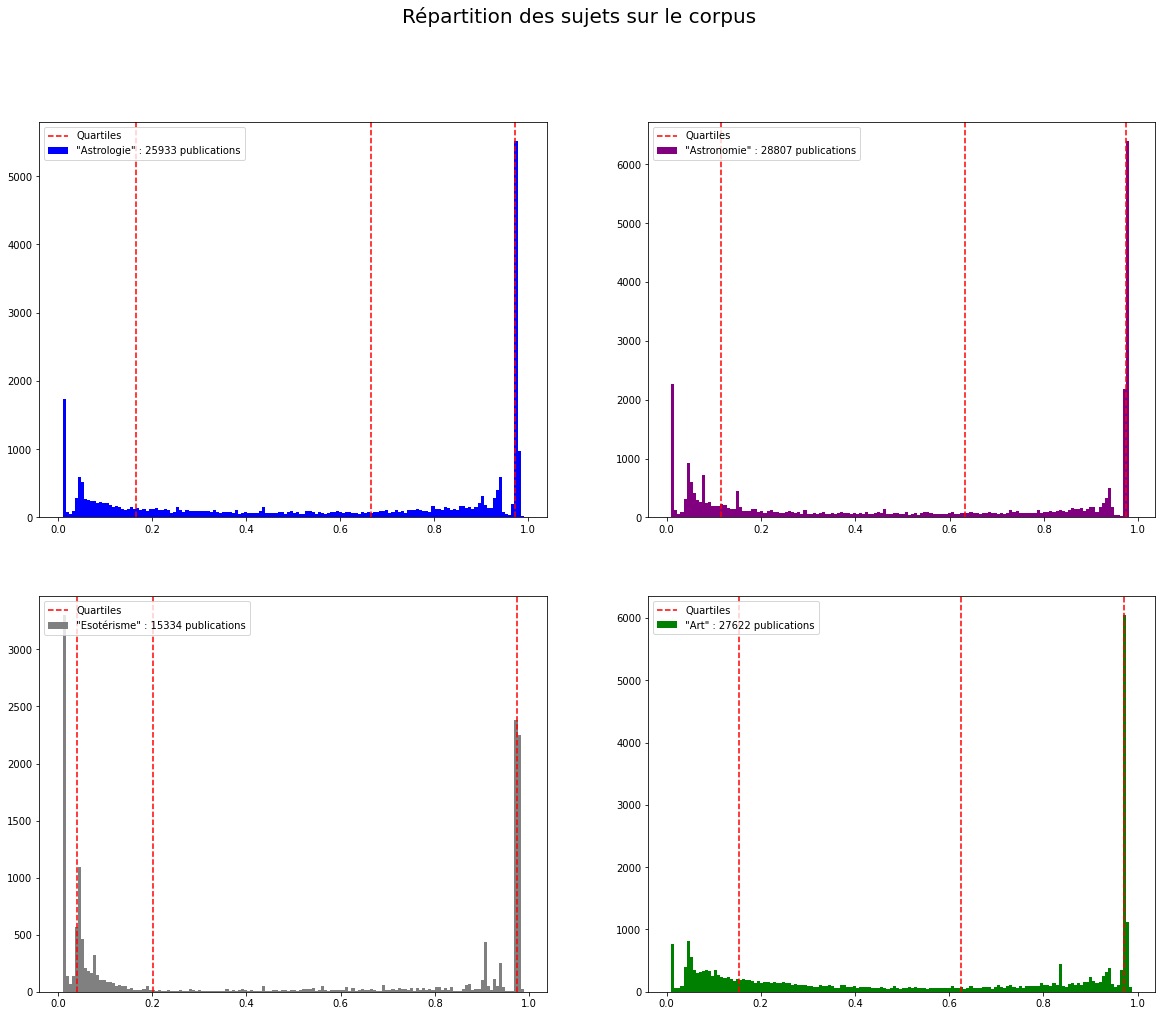

In [17]:
#Pourcentage d'apparition des sujets par publication, avec les quartiles

#fig = plt.figure(figsize=(20,8))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,16))
ax1.hist(df0['0'], bins=150,color='b',alpha=1, histtype="barstacked", label= '"Astrologie" : '
        + str(round(df0['0'].describe()[0])) + ' publications')
ax1.axvline(x=df0['0'].describe()[4], color='r', ls='--', label='Quartiles')
ax1.axvline(x=df0['0'].describe()[5], color='r', ls='--')
ax1.axvline(x=df0['0'].describe()[6], color='r', ls='--')
ax2.hist(df1['1'], bins=150,color='purple',alpha=1, histtype="barstacked", label= '"Astronomie" : '
        + str(round(df1['1'].describe()[0])) + ' publications')
ax2.axvline(x=df1['1'].describe()[4], color='r', ls='--', label='Quartiles')
ax2.axvline(x=df1['1'].describe()[5], color='r', ls='--')
ax2.axvline(x=df1['1'].describe()[6], color='r', ls='--')
ax3.hist(df2['2'], bins=150,color='gray',alpha=1, histtype="barstacked", label= '"Esotérisme" : '
        + str(round(df2['2'].describe()[0])) + ' publications')
ax3.axvline(x=df2['2'].describe()[4], color='r', ls='--', label='Quartiles')
ax3.axvline(x=df2['2'].describe()[5], color='r', ls='--')
ax3.axvline(x=df2['2'].describe()[6], color='r', ls='--')
ax4.hist(df3['3'], bins=150,color='g',alpha=1, histtype="barstacked", label= '"Art" : '
        + str(round(df3['3'].describe()[0])) + ' publications')
ax4.axvline(x=df3['3'].describe()[4], color='r', ls='--', label='Quartiles')
ax4.axvline(x=df3['3'].describe()[5], color='r', ls='--')
ax4.axvline(x=df3['3'].describe()[6], color='r', ls='--')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
fig.suptitle('Répartition des sujets sur le corpus' , fontsize=20)

In [18]:
#Sauvegarder
fig.savefig("sujet_corpus.svg")

Text(0.5, 0.98, 'Répartition des sujets sur le corpus selon le thème "ésotérisme"')

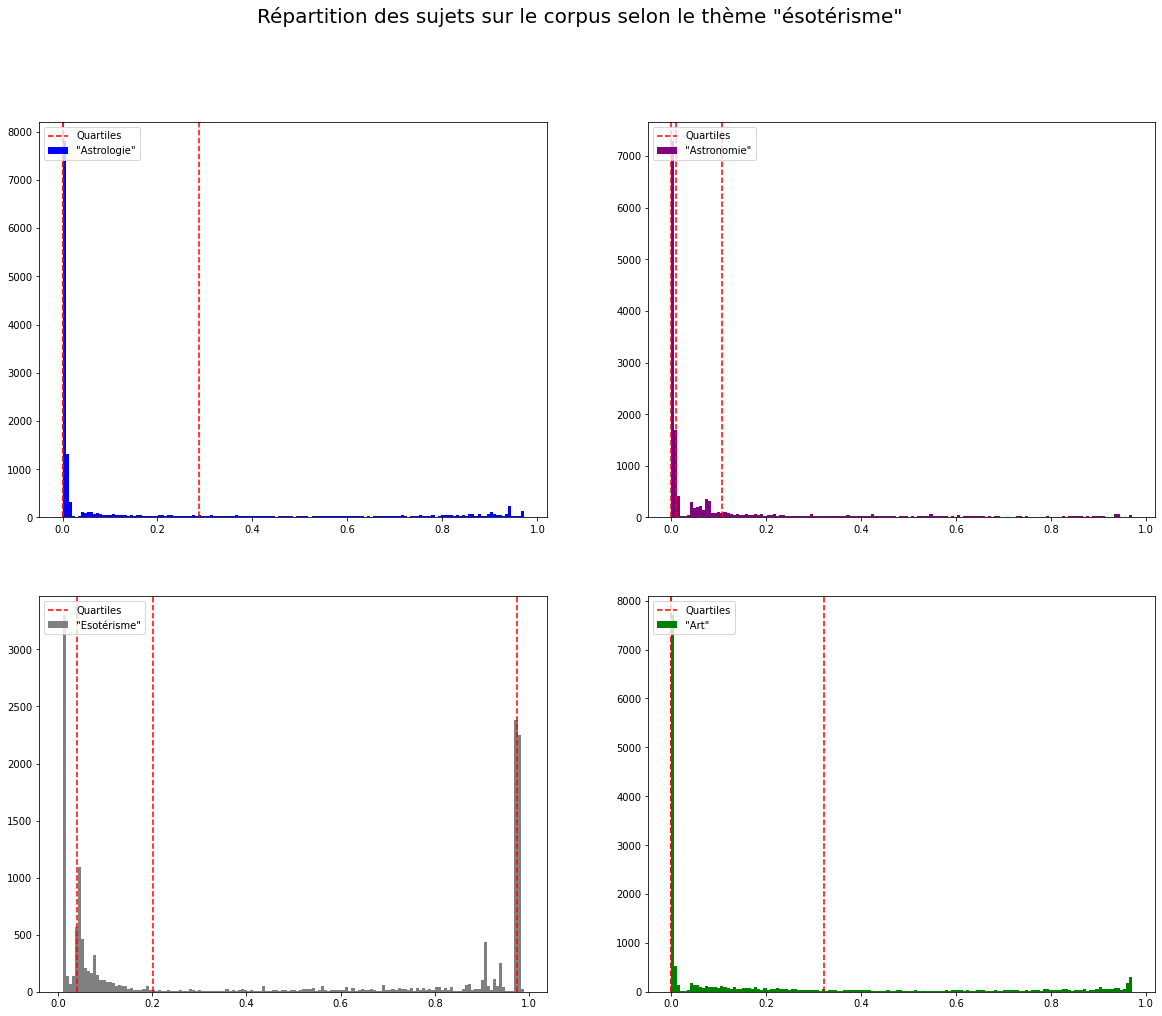

In [31]:
#fig = plt.figure(figsize=(20,8))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,16))
ax1.hist(df2['0'], bins=150,color='b',alpha=1, histtype="barstacked", label= '"Astrologie"')
ax1.axvline(x=df2['0'].describe()[4], color='r', ls='--', label='Quartiles')
ax1.axvline(x=df2['0'].describe()[5], color='r', ls='--')
ax1.axvline(x=df2['0'].describe()[6], color='r', ls='--')
ax2.hist(df2['1'], bins=150,color='purple',alpha=1, histtype="barstacked", label= '"Astronomie"')
ax2.axvline(x=df2['1'].describe()[4], color='r', ls='--', label='Quartiles')
ax2.axvline(x=df2['1'].describe()[5], color='r', ls='--')
ax2.axvline(x=df2['1'].describe()[6], color='r', ls='--')
ax3.hist(df2['2'], bins=150,color='gray',alpha=1, histtype="barstacked", label= '"Esotérisme"')
ax3.axvline(x=df2['2'].describe()[4], color='r', ls='--', label='Quartiles')
ax3.axvline(x=df2['2'].describe()[5], color='r', ls='--')
ax3.axvline(x=df2['2'].describe()[6], color='r', ls='--')
ax4.hist(df2['3'], bins=150,color='g',alpha=1, histtype="barstacked", label= '"Art"')
ax4.axvline(x=df2['3'].describe()[4], color='r', ls='--', label='Quartiles')
ax4.axvline(x=df2['3'].describe()[5], color='r', ls='--')
ax4.axvline(x=df2['3'].describe()[6], color='r', ls='--')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
fig.suptitle('Répartition des sujets sur le corpus selon le thème "ésotérisme"' , fontsize=20)

In [22]:
#Sauvegarder
fig.savefig("sujet_esoterisme_corpus.svg")

In [29]:
#Nombre de publications avec 80% du thème "ésotérime"

df_esoterisme = df2[(df2['2'] > 0.8)]
print(f"Publications : {len(df_esoterisme)}")

Publications : 6185


Text(0.5, 0.98, 'Répartition des sujets sur le corpus selon le thème "art"')

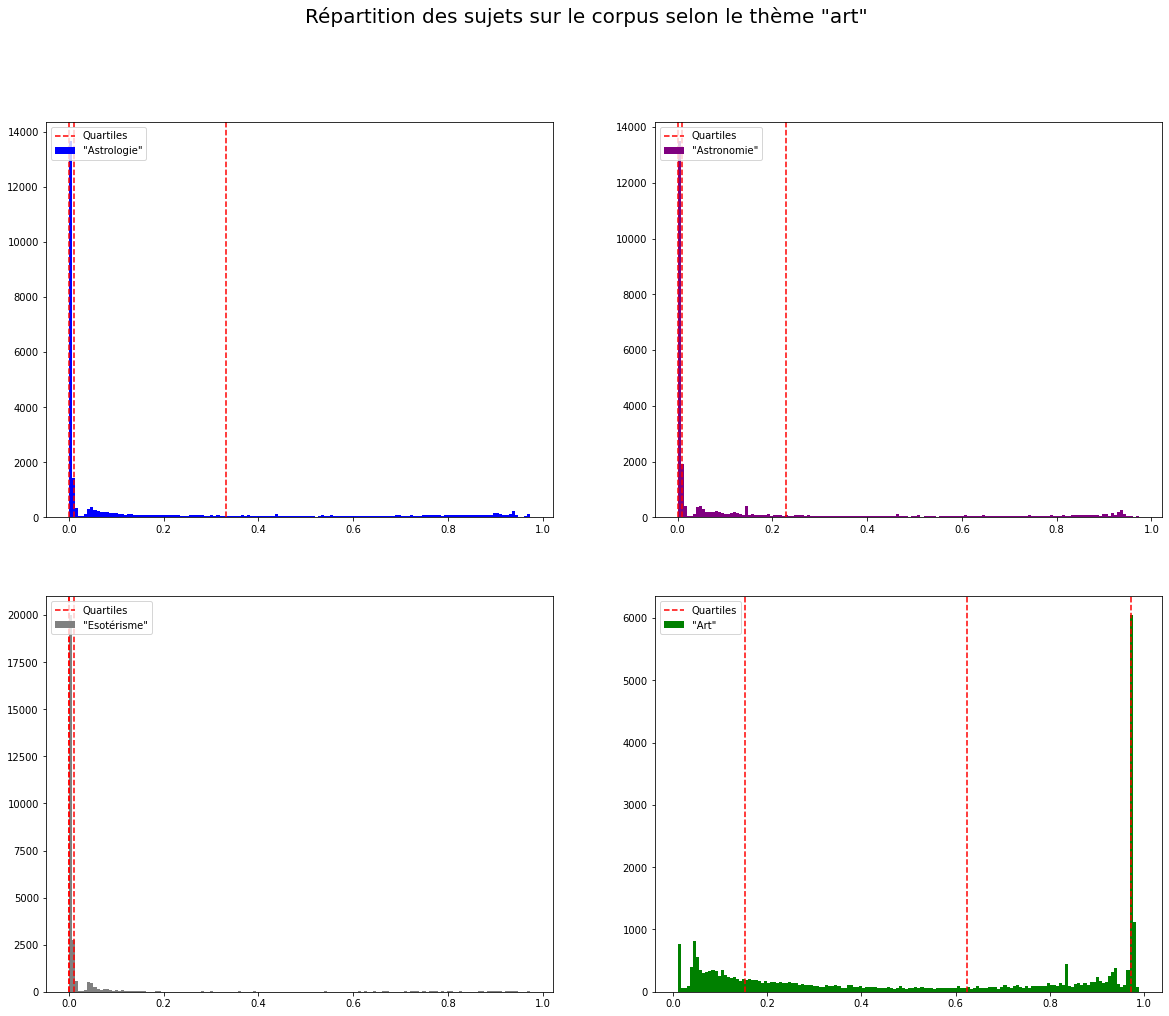

In [23]:
#fig = plt.figure(figsize=(20,8))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,16))
ax1.hist(df3['0'], bins=150,color='b',alpha=1, histtype="barstacked", label= '"Astrologie"')
ax1.axvline(x=df3['0'].describe()[4], color='r', ls='--', label='Quartiles')
ax1.axvline(x=df3['0'].describe()[5], color='r', ls='--')
ax1.axvline(x=df3['0'].describe()[6], color='r', ls='--')
ax2.hist(df3['1'], bins=150,color='purple',alpha=1, histtype="barstacked", label= '"Astronomie"')
ax2.axvline(x=df3['1'].describe()[4], color='r', ls='--', label='Quartiles')
ax2.axvline(x=df3['1'].describe()[5], color='r', ls='--')
ax2.axvline(x=df3['1'].describe()[6], color='r', ls='--')
ax3.hist(df3['2'], bins=150,color='gray',alpha=1, histtype="barstacked", label= '"Esotérisme"')
ax3.axvline(x=df3['2'].describe()[4], color='r', ls='--', label='Quartiles')
ax3.axvline(x=df3['2'].describe()[5], color='r', ls='--')
ax3.axvline(x=df3['2'].describe()[6], color='r', ls='--')
ax4.hist(df3['3'], bins=150,color='g',alpha=1, histtype="barstacked", label= '"Art"')
ax4.axvline(x=df3['3'].describe()[4], color='r', ls='--', label='Quartiles')
ax4.axvline(x=df3['3'].describe()[5], color='r', ls='--')
ax4.axvline(x=df3['3'].describe()[6], color='r', ls='--')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
fig.suptitle('Répartition des sujets sur le corpus selon le thème "art"' , fontsize=20)

In [24]:
#Sauvegarder
fig.savefig("sujet_art_corpus.svg")

In [26]:
#Nombre de publications avec 80% du thème "art"

df_art = df3[(df3['3'] > 0.8)]
print(f"Publications : {len(df_art)}")

Publications : 11639


In [27]:
#Création d'une list ou l'ID correspond au nom de  ou des image(s)

list_id_df = df_art.id.tolist()
list_id = []
for i in list_id_df:
    i=str(i)
    list_id.append((i)[0:4] + '-' + (i)[4:6] + '-' + (i)[6:8] + '_' + (i)[8:10] + '-' + (i)[10:12] + '-' + (i)[12:14]+ '_UTC')

In [38]:
#Faire un dossier avec les images, selon la thématique

import os, shutil
from tqdm import tqdm

list_id = list_id #Choose list
path_in=" "
path_out=" "
if not os.path.isdir(path_out):
        os.mkdir(path_out)

lf = []
for root, dirs, files in os.walk(path_in):
    for f in tqdm(files):
        if f.endswith('.jpg'):
            if f.startswith(tuple(i for i in list_id)):
                if f is not None:
                    path_save = os.path.join(path_out + '/' + f)
                    path_from = os.path.join(root + '/' + f)
                    os.stat(path_out).st_mode
                    lf.append(f)
                    shutil.copy(path_from, path_save)

print(f'Done !\n{len(lf)} images found')

100%|██████████| 860804/860804 [18:23<00:00, 779.85it/s]  


Done !
18803 images found


**Il y a plus d'images au final que dans la dataframe, car pour une publications il peut y avoir plusieurs images**

In [30]:
#Sauvegarder les tables 

df_art.to_csv('venus_art.csv')
df_esoterisme.to_csv('venus_esoterisme.csv')